# Load data

In [2]:
# import packages and data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/train.csv')
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


On a quick glance, some data cleaning to be done:  
- categorical data need to be converted to numerical(?) via encoding (eg job, marital, education, default, housing, loan, contact, month)

In [23]:
# inspect data
print(f"dimensions: {df.shape}")
# print(f"features: \n{df.columns}")
print(f"count of missing values:\n{df.isna().sum()}")
print(f"count of duplicated rows: {df.duplicated().sum()}")
# print(f"descriptive statistics:\n{df.describe()}")

dimensions: (750000, 18)
count of missing values:
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
count of duplicated rows: 0


In [ ]:
# select categorical columns automatically
cat_cols = df.select_dtypes(include='object').columns

# loop through each categorical column
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-"*30)

Column: job
job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64
------------------------------
Column: marital
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64
------------------------------
Column: education
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64
------------------------------
Column: default
default
no     737151
yes     12849
Name: count, dtype: int64
------------------------------
Column: housing
housing
yes    411288
no     338712
Name: count, dtype: int64
------------------------------
Column: loan
loan
no     645023
yes    104977
Name: count, dtype: int64
------------------------------
Column: contact

# EDA

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


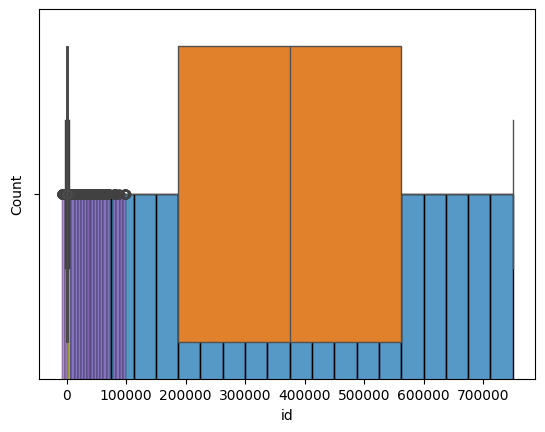

In [10]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    # print(df[col].describe())
    print(sns.histplot(df[col], bins=20))  # distribution
    sns.boxplot(x=df[col]) 

<Axes: xlabel='job', ylabel='count'>

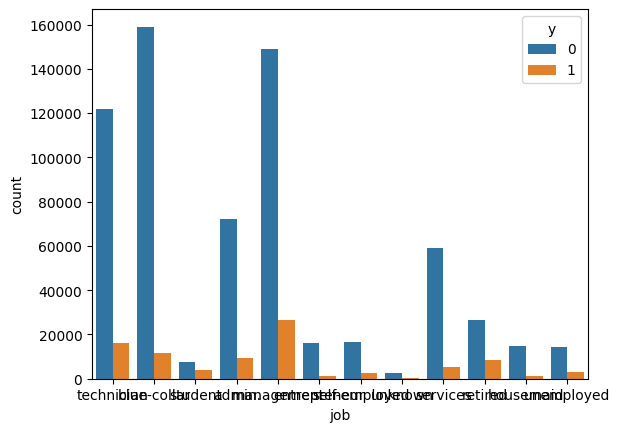

In [6]:
# If binary target y
# sns.countplot(x='y', data=df)

# # Numeric vs target
# sns.boxplot(x='y', y='age', data=df)

# # Categorical vs target
sns.countplot(x='job', hue='y', data=df)


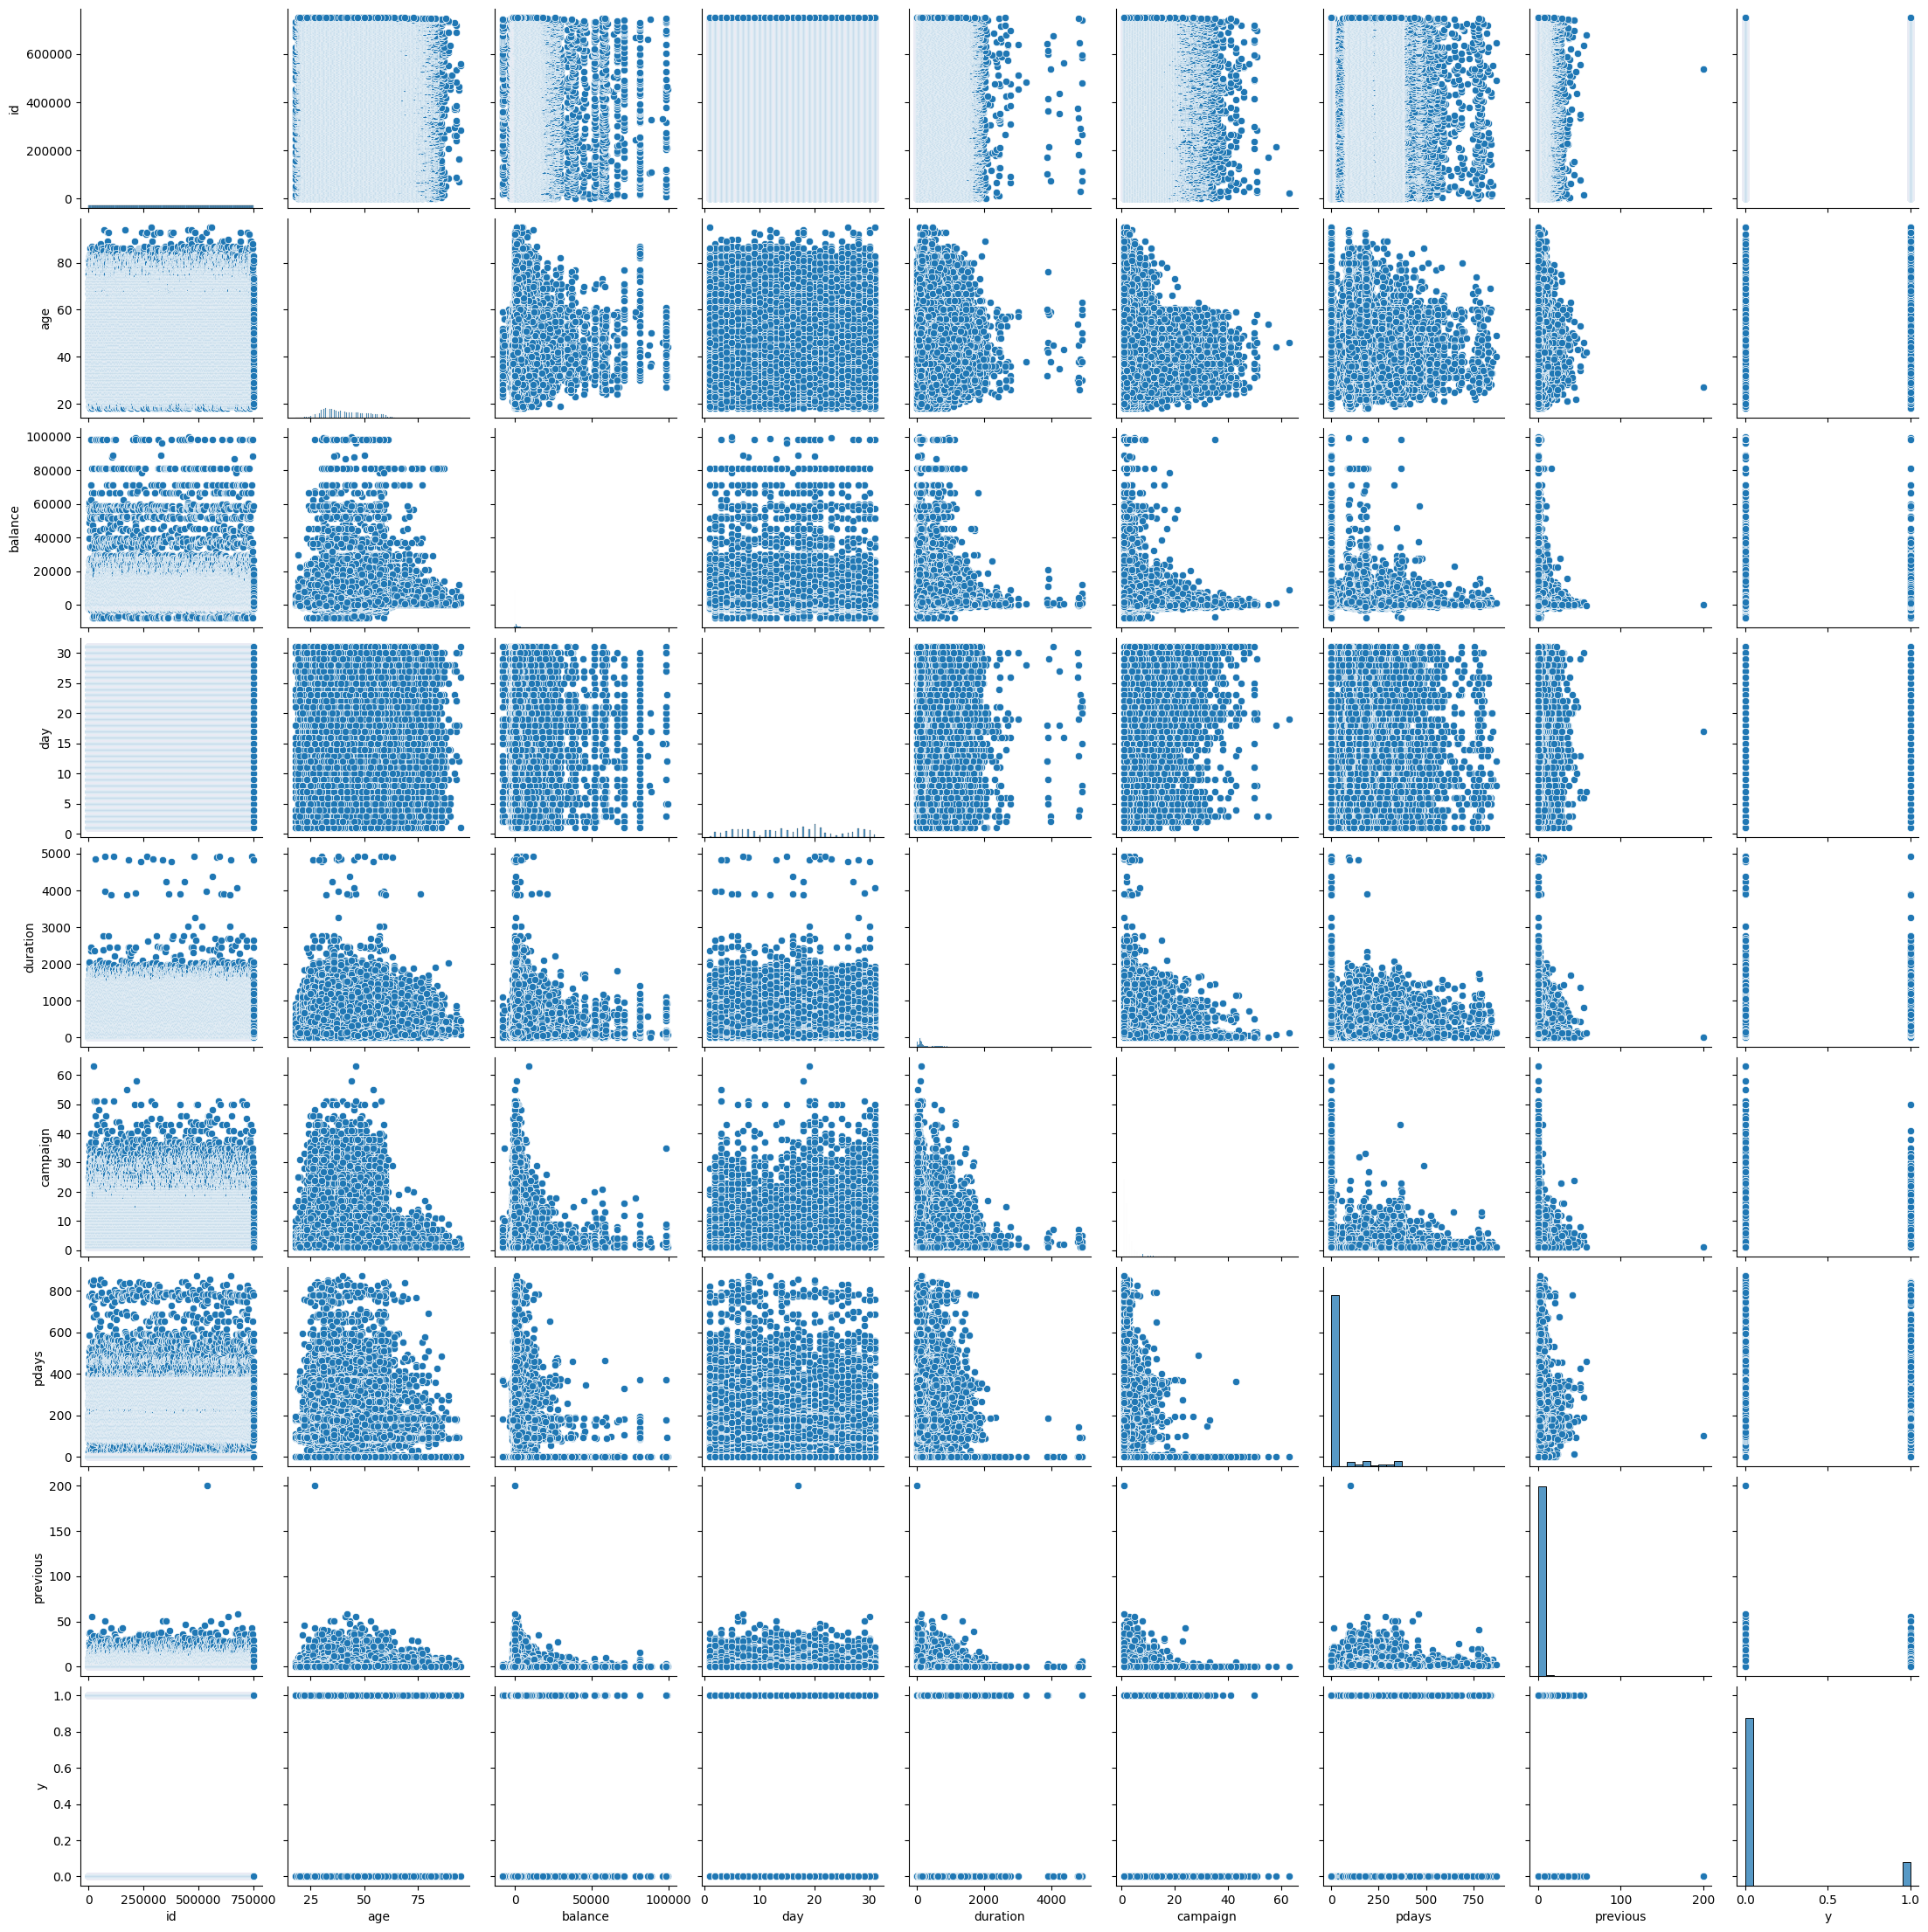

In [11]:
# Correlation matrix
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Pairwise relationships (small datasets)
sns.pairplot(df[num_cols])
